<a href="https://colab.research.google.com/github/bruluc81/AIML-Primary/blob/master/Project_4_Bruno_Suresh_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description:
The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. <br> Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

## Visual Analysis of Data using Excel
1. 19 Columns and 846 rows
2. All are Numeric values except for Class column.
3. _compactness_ - Numeric. Ranges from 73 to 119.  No Null Values
4. _circularity_ - Ranges from 33 to 59. 5 Null Values
5. _distance_circularity_ - Ranges from 40 to 112. 4 Null Values
6. _radius_ratio_ - Rages from 104 to 333. 6 Null Values
7. _pr.axis_aspect_ratio_ - Ranges from 47 to 138. 2 Null Values
8. _max.length_aspect_ratio_ - Ranges from 2 to 55.  No Null Values
9. _scatter_ratio_ - Ranges from 112 to 265.  1 Null Value
10. _elongatedness_ - Ranges from 26 to 61. 1 Null Value
11. _pr.axis_rectangularity_ - Ranges from 17 to 29.  3 Null Values
12. _max.length_rectangularity_ - Ranges from 118 to 188.  No Null Values.
13. _scaled_variance_ -Ranges from 130 to 320.  3 Null Values
14. _scaled_variance.1_ - Ranges from 184 to 1018. 2 Null Values
15. _scaled_radius_of_gyration_ - Ranges from 109 to 268. 2 Null Values.
16. _scaled_radius_of_gyration.1_ - Ranges from 59 to 135. 4 Null Values.
17. _skewness_about_ - Ranges from 0 to 22. 6 Null Values.
18. _skewness_about.1_ - Ranges from 0 to 41. 1 Null Value.
19. _skewness_about.2_ - Ranges from 176 to 206. 1 Null Value.
20. _hollows_ratio_ - Ranges from 181 to 211.No Null Values.
21. Total: 846 - Class - Van (199) / car (429) / Bus (218)

In [0]:
# Display Plots or Graphs as required immediately without show() function. 
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split # Used to split the data into Training and Testing split
from sklearn import preprocessing
from sklearn.svm import SVC # Support Vector Classifier Package
from sklearn import metrics # calculate accuracy measures and confusion matrix
from sklearn.metrics import roc_curve, auc # to measure the optimal method
from sklearn.metrics import roc_auc_score # to get the ROC AUC score
from sklearn import metrics # calculate accuracy measures and confusion matrix
from sklearn.decomposition import PCA
from sklearn.metrics import average_precision_score

### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [0]:
URL = 'https://raw.githubusercontent.com/bruluc81/AIML-Primary/master/vehicle.csv' 
vehdf = pd.read_csv(URL) #Importing CSV file onto a DataFrame

In [5]:
vehdf.head()

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus

[5 rows x 19 columns]

Observation:  There are null values in some of the 19 columns.  Total records is 846 and we see some of the fields have lesser than 846 records.  Further analysis is required to understand the missing values.  Most of the fields are Float64 type and the target variable is an object type.

#### Treating Missing Values

In [6]:
#Confirm that there are no null values in the data set.  This is achieved by using the isnull() function and value counts.
null_columns=vehdf.columns[vehdf.isnull().any()] # identifiying the number of columns having null values.
vehdf[null_columns].isnull().sum() #checking the count of null values in each column

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

Observation:  14 of 19 columns have missing values.  Missing values treatment is required.  As all are continuous variables that has missing values, filling them with Mean values of the column. 

In [7]:
vehdf.describe() # Use Describe() to understand the distribution of the data before missing values treatment.

compactness  circularity  ...  skewness_about.2  hollows_ratio
count   846.000000   841.000000  ...        845.000000     846.000000
mean     93.678487    44.828775  ...        188.919527     195.632388
std       8.234474     6.152172  ...          6.155809       7.438797
min      73.000000    33.000000  ...        176.000000     181.000000
25%      87.000000    40.000000  ...        184.000000     190.250000
50%      93.000000    44.000000  ...        188.000000     197.000000
75%     100.000000    49.000000  ...        193.000000     201.000000
max     119.000000    59.000000  ...        206.000000     211.000000

[8 rows x 18 columns]

In [0]:
vehdf = vehdf.fillna(vehdf.mean()) #Fill Missing Values with the Mean of the column

In [0]:
vehdf['class'].replace(('car', 'bus','van'), (0,1,2), inplace=True)

In [100]:
vehdf[null_columns].isnull().sum() #Check if all missing values are filled in

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

In [101]:
vehdf.describe().T #Look at key values again to confirm there are no missing values.

count        mean  ...     75%     max
compactness                  846.0   93.678487  ...  100.00   119.0
circularity                  846.0   44.828775  ...   49.00    59.0
distance_circularity         846.0   82.110451  ...   98.00   112.0
radius_ratio                 846.0  168.888095  ...  195.00   333.0
pr.axis_aspect_ratio         846.0   61.678910  ...   65.00   138.0
max.length_aspect_ratio      846.0    8.567376  ...   10.00    55.0
scatter_ratio                846.0  168.901775  ...  198.00   265.0
elongatedness                846.0   40.933728  ...   46.00    61.0
pr.axis_rectangularity       846.0   20.582444  ...   23.00    29.0
max.length_rectangularity    846.0  147.998818  ...  159.00   188.0
scaled_variance              846.0  188.631079  ...  217.00   320.0
scaled_variance.1            846.0  439.494076  ...  586.75  1018.0
scaled_radius_of_gyration    846.0  174.709716  ...  198.00   268.0
scaled_radius_of_gyration.1  846.0   72.447743  ...   75.00   135.0
skewness_about               846.0    6.364286  ...    9.00    22.0
skewness_about.1             846.0   12.602367  ...   19.00    41.0
skewness_about.2             846.0  188.919527  ...  193.00   206.0
hollows_ratio                846.0  195.632388  ...  201.00   211.0
class                        846.0    0.728132  ...    1.00     2.0

[19 rows x 8 columns]

Observation:  All Null Values fields are filled by their corresponding mean values using the Fillna() and mean() functions.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


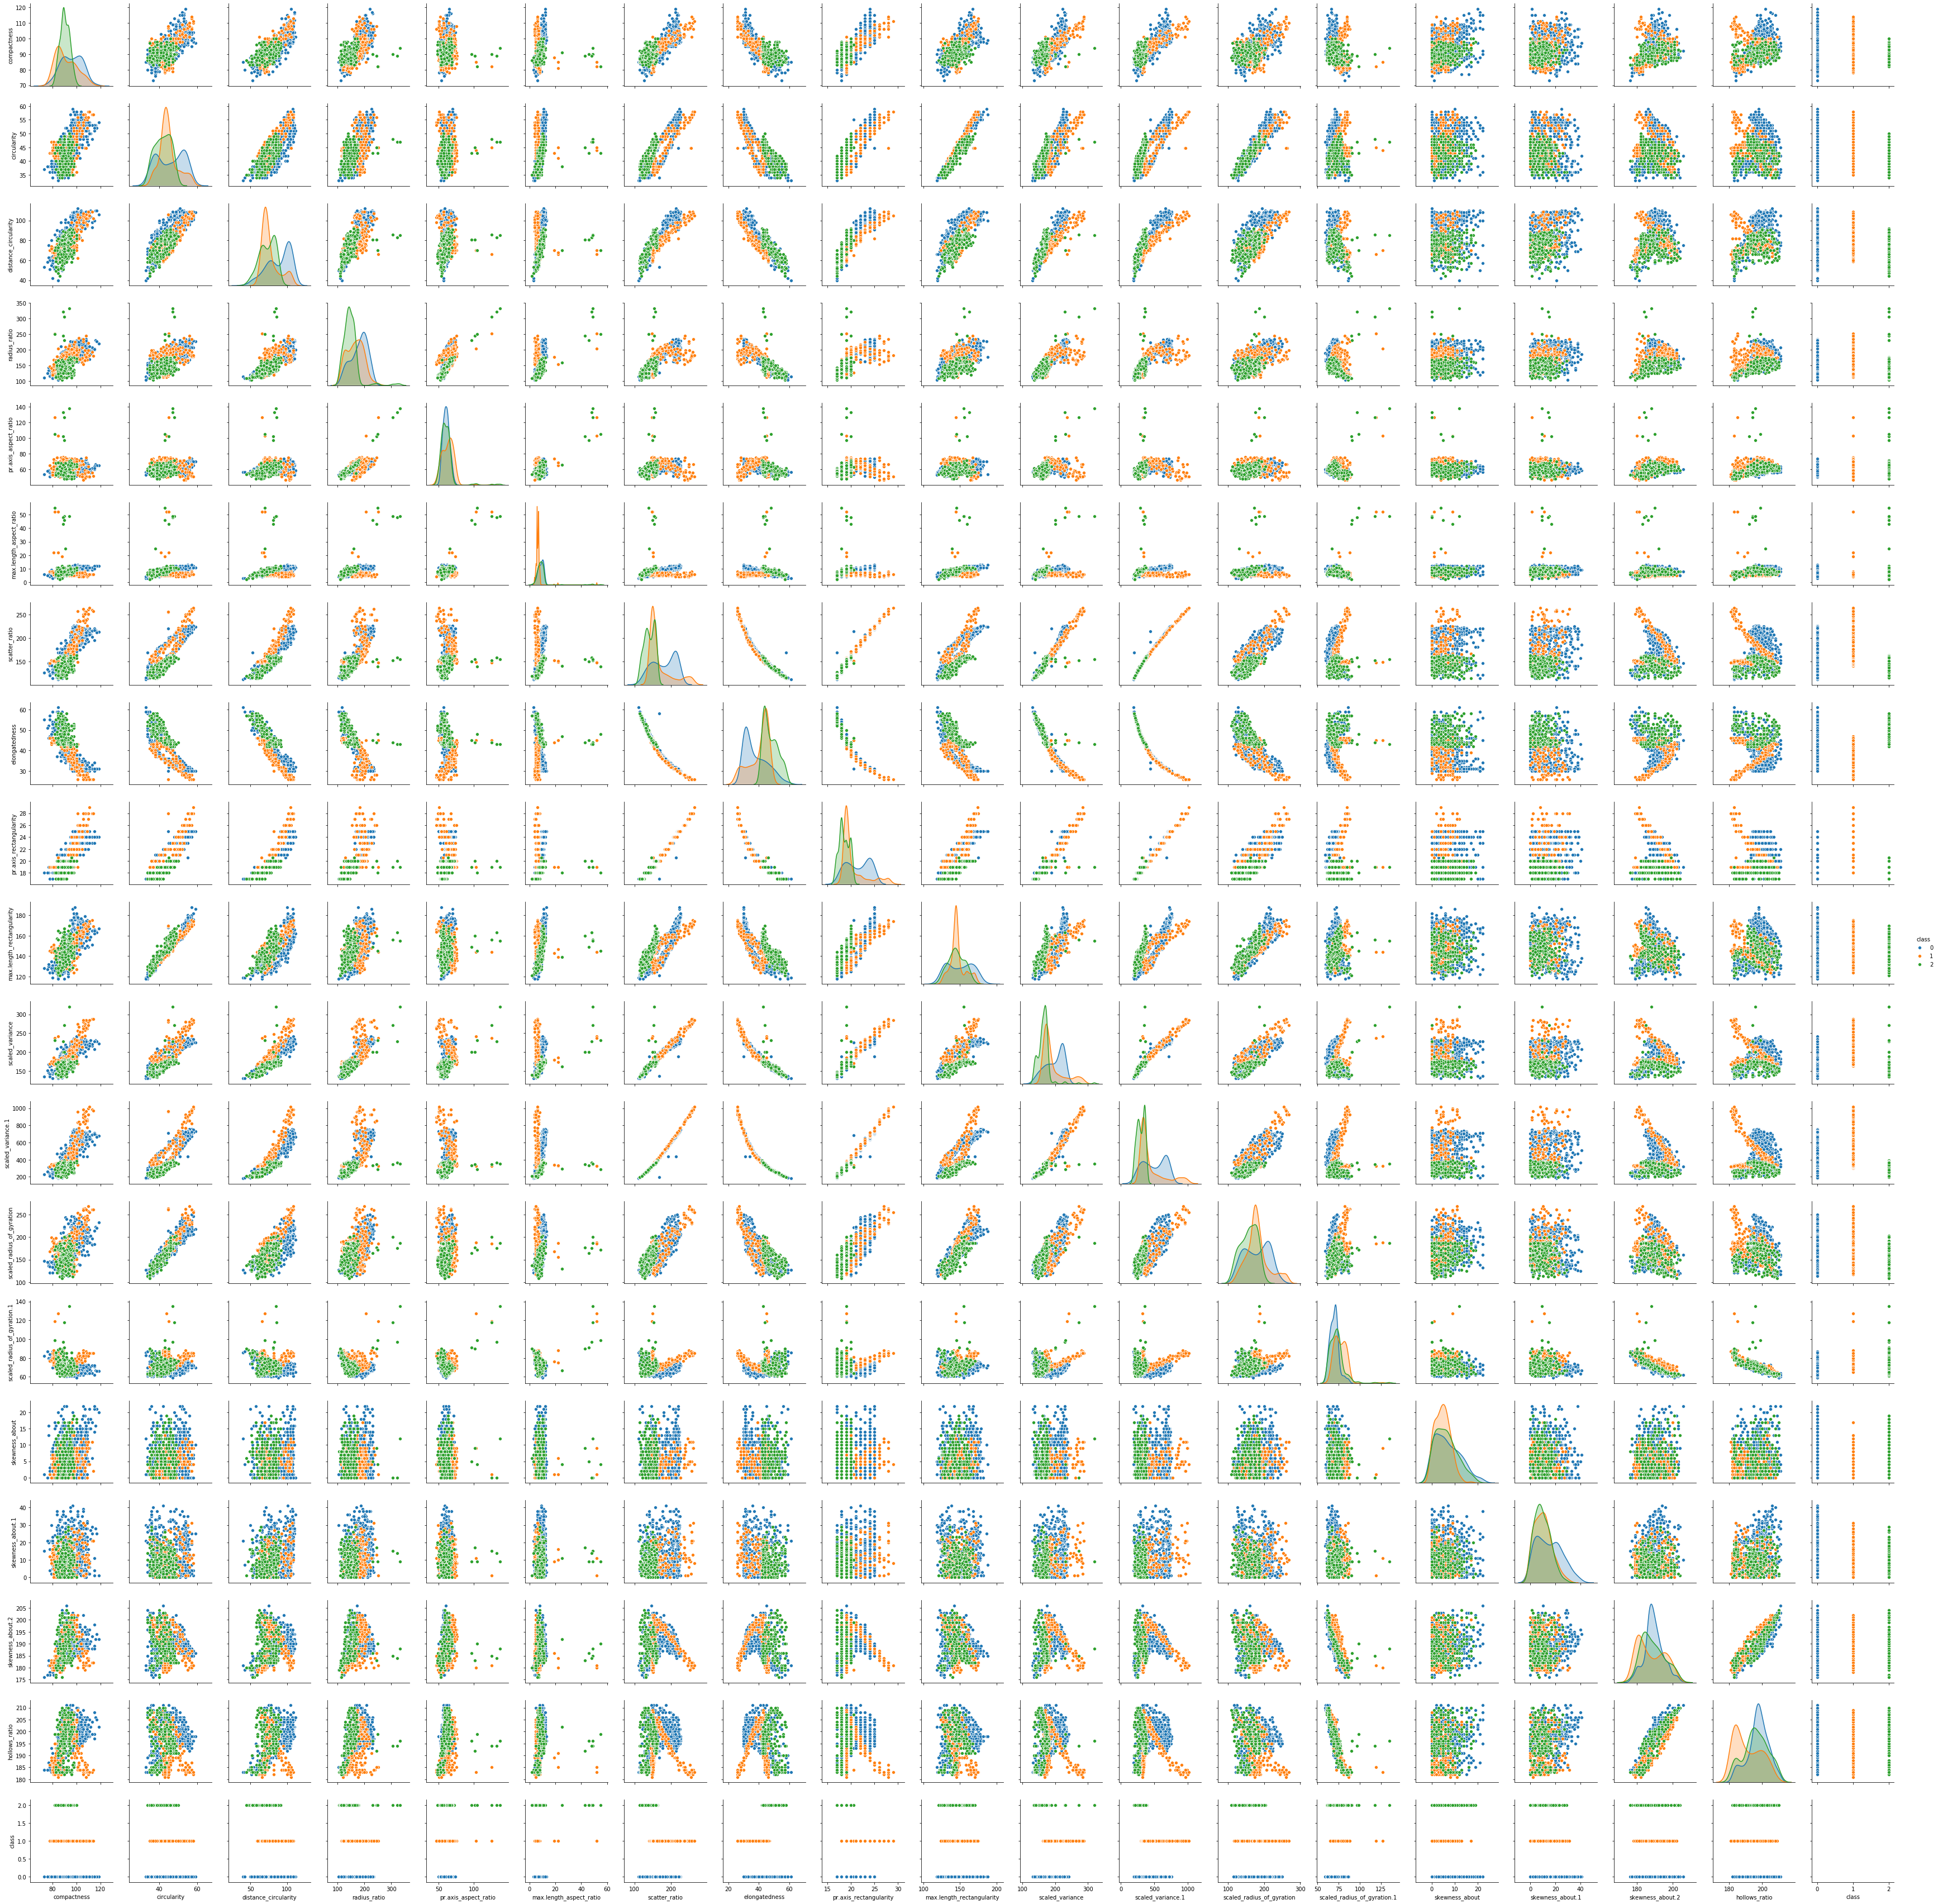

In [102]:
# Use the PairPlot to understand individual variables and its distribution.
sns.pairplot(vehdf,diag_kind='kde',hue = "class")


#### Five Point Summary and Outliers identification

In [113]:
from numpy import percentile # to find the different Quartile Values for individual variables.
from scipy.stats import skew
# Initiate a group of Series Variables storing Five Point Summary values.
Min = [] 
Max = [] 
Mean = []
LBound = []
UBound = []
IQR = []
Skew = []
Outliers = []
Attri = []

#Below FOR Loop populates the series with the 5 Point details of each independent variables of the Dataset.
for i in vehdf.columns:
    Min.append(vehdf[i].min())
    Max.append(vehdf[i].max())
    Mean.append(vehdf[i].mean())
    a1,a3 = np.percentile(vehdf[i], [25, 75]) # calculate the First and Third Quartile Values
    IQR.append(a3-a1) # Calculare the Inter Quartile Range using the Third and First Quartile Values
    LBound.append(a1 -(1.5 * (a3-a1)))
    UBound.append(a3 +(1.5 * (a3-a1)))
    Skew.append(skew(vehdf[i]))
    Out = (vehdf[vehdf[i].le(a1)], vehdf[vehdf[i].ge(a3)]) # Find the Outliers are outside the First and Third Quartiles.
    Outliers.append(len(Out[0])) # Find the count of the outliers
    Attri.append(i)
    if i == "hollows_ratio":
        break 

FivePoint = pd.DataFrame(
    {'Attributes': Attri,
     'Min': Min,
     'Max': Max,
     'Mean': Mean,
     'LowerBound':LBound,
     'UpperBound':UBound,
     'Inter Quartile':IQR,
     'Skewness': Skew,
     'Outliers':Outliers,
    })
FivePoint.set_index('Attributes',inplace=True)
FivePoint


Min     Max  ...  Skewness  Outliers
Attributes                                  ...                    
compactness                   73.0   119.0  ...  0.380594       215
circularity                   33.0    59.0  ...  0.262118       241
distance_circularity          40.0   112.0  ...  0.106647       234
radius_ratio                 104.0   333.0  ...  0.395678       217
pr.axis_aspect_ratio          47.0   138.0  ...  3.828079       242
max.length_aspect_ratio        2.0    55.0  ...  6.766369       374
scatter_ratio                112.0   265.0  ...  0.606551       225
elongatedness                 26.0    61.0  ...  0.047790       221
pr.axis_rectangularity        17.0    29.0  ...  0.770884       409
max.length_rectangularity    118.0   188.0  ...  0.255904       220
scaled_variance              130.0   320.0  ...  0.651595       213
scaled_variance.1            184.0  1018.0  ...  0.841532       212
scaled_radius_of_gyration    109.0   268.0  ...  0.279151       213
scaled_radius_of_gyration.1   59.0   135.0  ...  2.084717       218
skewness_about                 0.0    22.0  ...  0.777895       221
skewness_about.1               0.0    41.0  ...  0.687202       214
skewness_about.2             176.0   206.0  ...  0.249025       215
hollows_ratio                181.0   211.0  ... -0.225940       212

[18 rows x 8 columns]

Observation:  Atleast around 28% (239 of 845) of all the Independent Variables are having Outliers.
- Interpreting Skewness
    - If skewness is less than −1 or greater than +1, the distribution is highly skewed.
    - If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
    - If skewness is between −½ and +½, the distribution is approximately symmetric.

#### Usage of BoxPlots to depict Outliers.

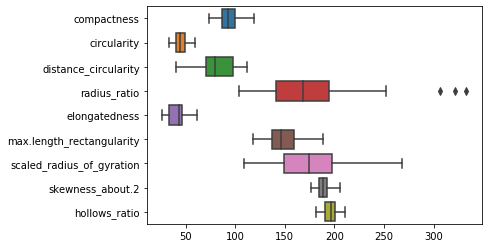

In [114]:
sns.boxplot(data=vehdf[list(FivePoint[(FivePoint['Skewness']>-0.5) & (FivePoint['Skewness']<0.5)].T.columns.values)], orient="h")
# to showcase the independent variables that have approximately Symmetric Distribution

Observation:  Above Boxplot depicts the independent variables which are approximately symmetric.

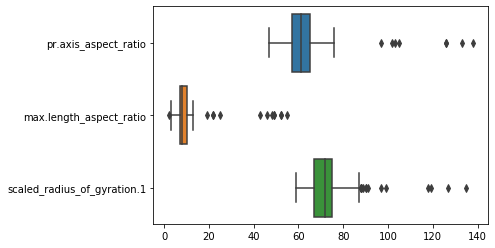

In [115]:
sns.boxplot(data=vehdf[list(FivePoint[(FivePoint['Skewness']<-1.0) | (FivePoint['Skewness']>1.0)].T.columns.values)], orient="h")
# to showcase the independent variables that are highly skewed.

Observation:  Above Independent variables are highly Skewed as per the boxplots.

#### Understand the Correlation between independent variables

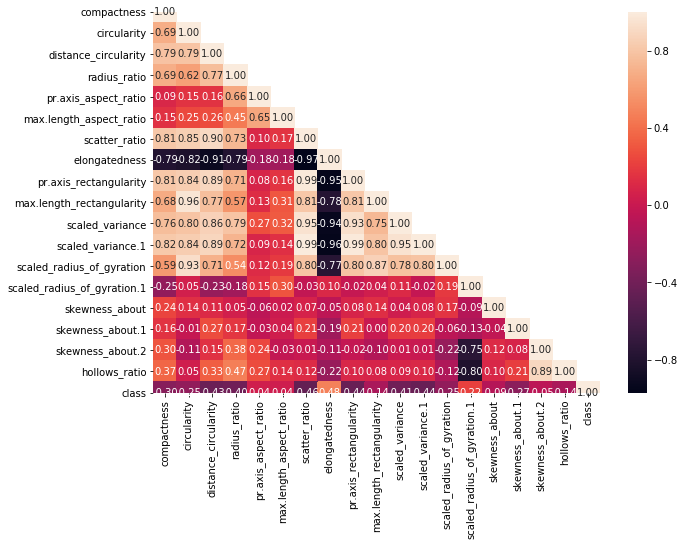

In [135]:
#Design a correlation heat map to understand the correlation within the independent variables.
#This will help us to determine any multicolinearity and remove the same from the dataset for building a better model.
corr = vehdf.corr()
plt.figure(figsize=(10,7))
mask = np.zeros_like(corr) # create a mask so we only see the correlation values once
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') # Plot the headmap and understand the correlation
labelx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
labely = a.set_yticklabels(a.get_yticklabels(), rotation=0)

Observation:  There is a lot of variables that have considerable correlation.  

In [117]:
chkname = [] # Series for spliting the column names
chkind = []  # Series for spliting the corresponding indexes.

for i, row in corr.iterrows():
    for j, column in corr.items():
        if column[(column>0.90) & (column < 1)].any() != 0:
            chkname.append(column[(column>0.90) & (column < 1)].name) # adding the columns
            chkind.append(column[(column>0.90) & (column < 1)].index) # adding the rows against columns that is > 0.90
            print(column[(column>0.90) & (column < 1)],'\n')
        
    if j == "hollows_ratio":
        break        

max.length_rectangularity    0.961943
scaled_radius_of_gyration    0.926888
Name: circularity, dtype: float64 

scatter_ratio    0.9044
Name: distance_circularity, dtype: float64 

distance_circularity      0.904400
pr.axis_rectangularity    0.989370
scaled_variance           0.948296
scaled_variance.1         0.993784
Name: scatter_ratio, dtype: float64 

scatter_ratio        0.989370
scaled_variance      0.934568
scaled_variance.1    0.989490
Name: pr.axis_rectangularity, dtype: float64 

circularity    0.961943
Name: max.length_rectangularity, dtype: float64 

scatter_ratio             0.948296
pr.axis_rectangularity    0.934568
scaled_variance.1         0.947021
Name: scaled_variance, dtype: float64 

scatter_ratio             0.993784
pr.axis_rectangularity    0.989490
scaled_variance           0.947021
Name: scaled_variance.1, dtype: float64 

circularity    0.926888
Name: scaled_radius_of_gyration, dtype: float64 

max.length_rectangularity    0.961943
scaled_radius_of_gyration 

Observation:  Below listed variables has high correlation and hence further analysis is required to ensure the multiple collinearity is removed.
- max.length_rectangularity
- scaled_radius_of_gyration
- scatter_ratio
- distance_circularity
- pr.axis_rectangularity
- scaled_variance
- scaled_variance.1
- circularity

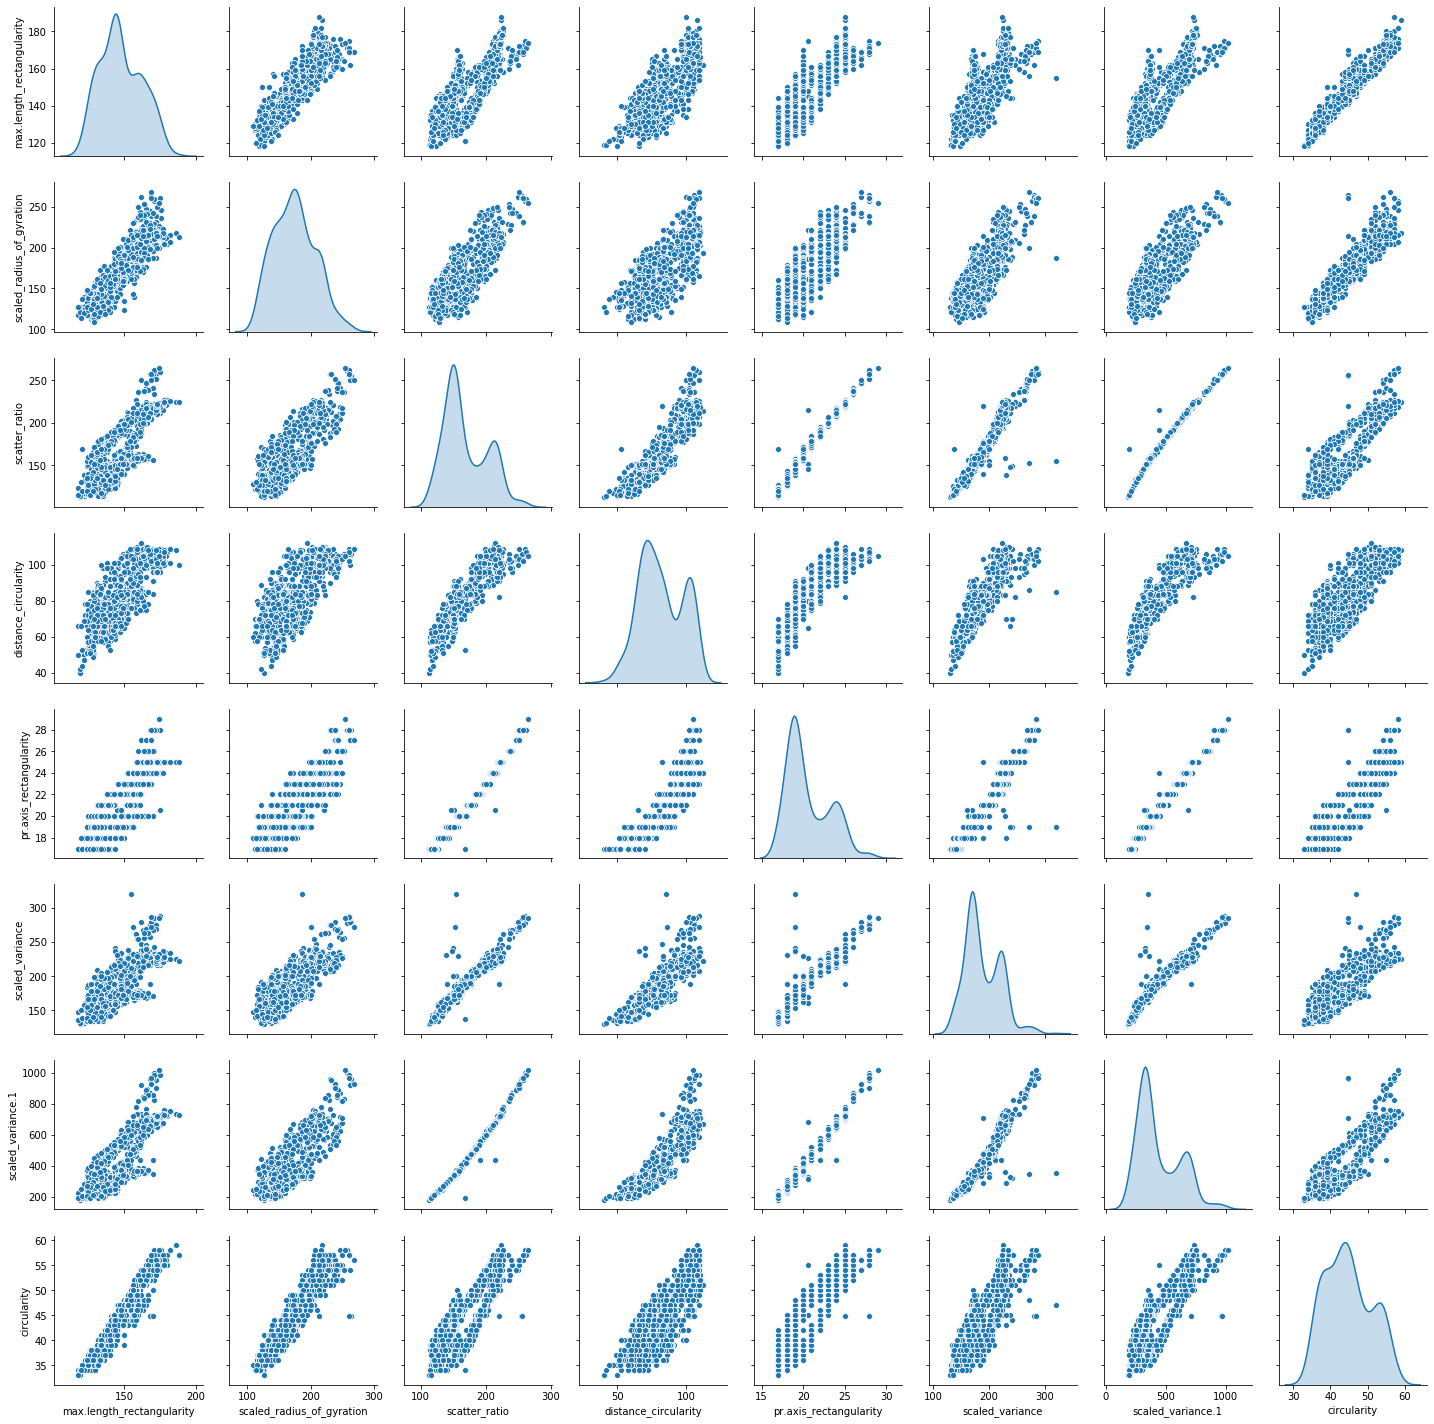

In [111]:
sns.pairplot(vehdf[['max.length_rectangularity',
'scaled_radius_of_gyration',
'scatter_ratio',
'distance_circularity',
'pr.axis_rectangularity',
'scaled_variance',
'scaled_variance.1',
'circularity']],
diag_kind='kde')

Observation: All the above Individual varaibles are determined to have high correlation of more than 90%.

### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

#### Remove Outliers using two different methods (IQR and ZScore)

In [136]:
vehdf_IQR = vehdf.copy()
x = list(Out[0].index)  # Outliers based on IQR calculated lying outside of the First and Third Quartiles.

for i in x:
    vehdf_IQR.drop([i],axis=0,inplace=True)
#    print(vehdf_IQR.iloc[i])

print("Actual Dataset Count:",vehdf.iloc[:,0].count(),"\n","After Outlier Removal using IQR:",vehdf_IQR.iloc[:,0].count())


Actual Dataset Count: 846 
 After Outlier Removal using IQR: 634


In [137]:
# Determining Outliers using zscore.
from scipy.stats import zscore
vehdf_Z = vehdf.copy()
numeric_cols = vehdf_Z.select_dtypes(include=[np.number]).columns
z = vehdf_Z[numeric_cols].apply(zscore)
vehdf_Z = vehdf_Z[(z < 3).all(axis=1)]
print("Actual Dataset Count:",vehdf.iloc[:,0].count(),"\n","After Outlier Removal using Zscore:",vehdf_Z.iloc[:,0].count())

Actual Dataset Count: 846 
 After Outlier Removal using Zscore: 824


#### Create another variant of the Dataset by removing the highly correlated independent variables

In [138]:
#Droping columns with high correlation
vehdf_corr = vehdf.copy()
vehdf_corr.drop(labels = ['max.length_rectangularity'] ,axis=1,inplace=True)
vehdf_corr.drop(labels =['scaled_radius_of_gyration'],axis=1,inplace=True)
vehdf_corr.drop(labels =['scatter_ratio'],axis=1,inplace=True)
vehdf_corr.drop(labels =['distance_circularity'],axis=1,inplace=True)
vehdf_corr.drop(labels =['pr.axis_rectangularity'],axis=1,inplace=True)
vehdf_corr.drop(labels =['scaled_variance'],axis=1,inplace=True)
vehdf_corr.drop(labels =['scaled_variance.1'],axis=1,inplace=True)
vehdf_corr.drop(labels =['circularity'],axis=1,inplace=True)

print("Actual Dataset Count:",len(vehdf.columns),"\n","After Multicollinearity Removal:",len(vehdf_corr.columns))

Actual Dataset Count: 19 
 After Multicollinearity Removal: 11


##3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

####  Initiate Principal Component Analysis

In [139]:
# Seperate the Independent and Dependent variables in the zscore version
vehdf_Z_Ind = vehdf_Z.drop('class',axis=1)
vehdf_Z_dep = vehdf_Z['class']
print("Independent Variables count of zscore Dataset:",vehdf_Z_Ind.shape)
print("Dependent Variables count of zscore Dataset:",vehdf_Z_dep.shape)


Independent Variables count of zscore Dataset: (824, 18)
Dependent Variables count of zscore Dataset: (824,)


In [140]:
vehdf_IQR_Ind = vehdf_IQR.drop('class',axis=1)
vehdf_IQR_dep = vehdf_IQR['class']
print("Independent Variables count of IQR Dataset:",vehdf_IQR_Ind.shape)
print("Dependent Variables count of IQR Dataset:",vehdf_IQR_dep.shape)
#vehdf_IQR_dep.replace({'car':0,'bus':1,'van':2},inplace=True)

Independent Variables count of IQR Dataset: (634, 18)
Dependent Variables count of IQR Dataset: (634,)


In [141]:
vehdf_corr_Ind = vehdf_corr.drop('class',axis=1)
vehdf_corr_dep = vehdf_corr['class']
print("Independent Variables count of Corr Dataset:",vehdf_corr_Ind.shape)
print("Dependent Variables count of Corr Dataset:",vehdf_corr_dep.shape)
#vehdf_IQR_dep.replace({'car':0,'bus':1,'van':2},inplace=True)

Independent Variables count of Corr Dataset: (846, 10)
Dependent Variables count of Corr Dataset: (846,)


In [142]:
#make the covariance matrix and we have 18 independent features so aur covariance matrix is 18*18 matrix
cov_matrix_zscore = np.cov(vehdf_Z_Ind,rowvar=False)
print("cov_matrix of Scaled zscore shape:",cov_matrix_zscore.shape)

cov_matrix_IQR = np.cov(vehdf_IQR_Ind,rowvar=False)
print("cov_matrix of Scaled IQR shape:",cov_matrix_IQR.shape)

cov_matrix_corr = np.cov(vehdf_corr_Ind,rowvar=False)
print("cov_matrix of Scaled Corr shape:",cov_matrix_corr.shape)

cov_matrix of Scaled zscore shape: (18, 18)
cov_matrix of Scaled IQR shape: (18, 18)
cov_matrix of Scaled Corr shape: (10, 10)


In [143]:
#eigen value and eigen vectors based on the covariance matrix
pca_Zscore = PCA(n_components=18)
pca_IQR = PCA(n_components = 18)
pca_corr = PCA(n_components = 10)
print(pca_Zscore.fit(vehdf_Z_Ind))
print(pca_IQR.fit(vehdf_IQR_Ind))
print(pca_corr.fit(vehdf_corr_Ind))

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [144]:
pca_Zscore.explained_variance_ratio_

array([9.64131807e-01, 1.62918241e-02, 1.04852445e-02, 2.53898107e-03,
       2.00174975e-03, 1.18044542e-03, 1.08601478e-03, 6.69604712e-04,
       6.00604146e-04, 3.40355455e-04, 2.60780126e-04, 1.57694806e-04,
       8.65058750e-05, 6.94019301e-05, 3.67127230e-05, 3.28441639e-05,
       2.64083588e-05, 3.02146374e-06])

In [145]:
pca_IQR.explained_variance_ratio_

array([9.54073894e-01, 1.78579636e-02, 1.65575084e-02, 3.16970532e-03,
       2.48778205e-03, 1.69884518e-03, 1.29029456e-03, 9.37316545e-04,
       6.82895566e-04, 3.76128453e-04, 3.39592962e-04, 1.86901579e-04,
       1.80711800e-04, 6.06707154e-05, 4.66852104e-05, 2.78523630e-05,
       2.16856930e-05, 3.56635475e-06])

In [146]:
pca_corr.explained_variance_ratio_

array([0.78578947, 0.07698744, 0.05264775, 0.04387296, 0.0165606 ,
       0.00985749, 0.00633458, 0.00439306, 0.00224254, 0.00131411])

In [147]:
pca_Zscore.explained_variance_

array([3.30208375e+04, 5.57983537e+02, 3.59112261e+02, 8.69583192e+01,
       6.85585237e+01, 4.04294270e+01, 3.71952439e+01, 2.29334913e+01,
       2.05702703e+01, 1.16569354e+01, 8.93153624e+00, 5.40093639e+00,
       2.96276549e+00, 2.37696738e+00, 1.25738499e+00, 1.12488955e+00,
       9.04467748e-01, 1.03483012e-01])

In [148]:
pca_IQR.explained_variance_

array([2.76428493e+04, 5.17407510e+02, 4.79728787e+02, 9.18374218e+01,
       7.20797255e+01, 4.92214720e+01, 3.73843352e+01, 2.71573305e+01,
       1.97858671e+01, 1.08977536e+01, 9.83919290e+00, 5.41519083e+00,
       5.23585132e+00, 1.75784230e+00, 1.35263343e+00, 8.06980130e-01,
       6.28310185e-01, 1.03329740e-01])

In [149]:
pca_corr.explained_variance_

array([1241.95122279,  121.67971838,   83.21051056,   69.3418208 ,
         26.17426334,   15.57989899,   10.0118921 ,    6.94328705,
          3.54436587,    2.07696956])

<Figure size 432x288 with 0 Axes>

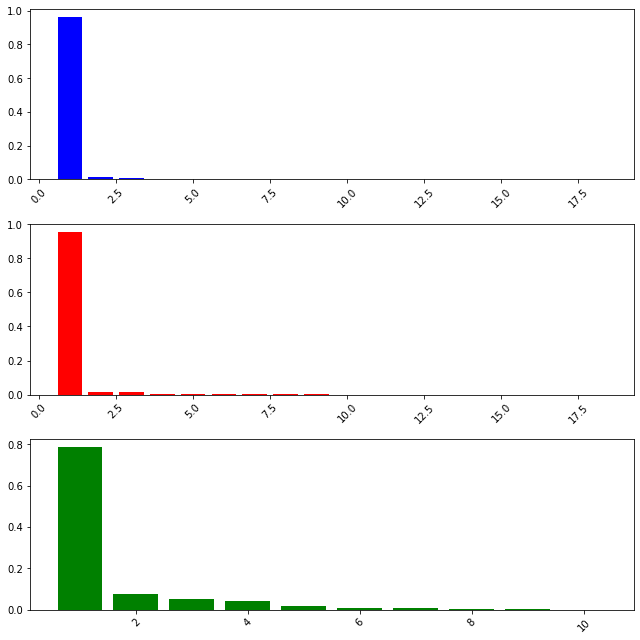

In [150]:
fig = plt.figure()
plt.figure(figsize=(9, 9))
plt.xlabel('eigen values')
plt.ylabel('variation')
plt.subplot(311)
plt.bar(list(range(1,19)),pca_Zscore.explained_variance_ratio_,color = 'blue')
plt.xticks(rotation=45)

plt.subplot(312)
plt.bar(list(range(1,19)),pca_IQR.explained_variance_ratio_,color = 'red')
plt.xticks(rotation=45)


plt.subplot(313)
plt.bar(list(range(1,11)),pca_corr.explained_variance_ratio_,color = 'green')
plt.xticks(rotation=45)

plt.tight_layout()

Observation: Out of the three variants of the dataset, there is a clear depiction that there are 10 variables which can be considered for the analysis. Removing highly correlated variables shows that only 10 variables has impact onto the dependent variable.

Plot the Variance Ratio onto Elbow curves to understand the optimal variables required.

<Figure size 432x288 with 0 Axes>

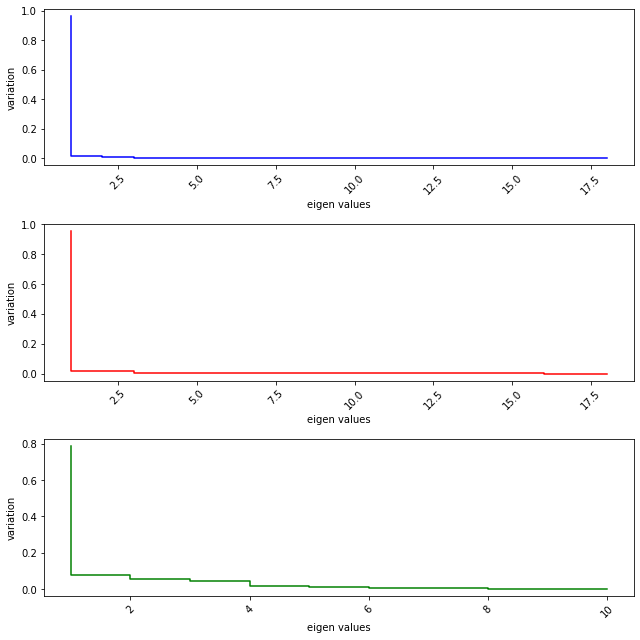

In [194]:
fig = plt.figure()
plt.figure(figsize=(9, 9))

plt.subplot(311)
plt.step(list(range(1,19)),pca_Zscore.explained_variance_ratio_,color = 'blue')
plt.xticks(rotation=45)
plt.xlabel('eigen values')
plt.ylabel('variation')

plt.subplot(312)
plt.step(list(range(1,19)),pca_IQR.explained_variance_ratio_,color = 'red')
plt.xticks(rotation=45)
plt.xlabel('eigen values')
plt.ylabel('variation')


plt.subplot(313)
plt.step(list(range(1,11)),pca_corr.explained_variance_ratio_,color = 'green')
plt.xticks(rotation=45)
plt.xlabel('eigen values')
plt.ylabel('variation')

plt.tight_layout()



Observation:  The above plot does not clearly show the dimension reduction.  We can try to use the Cummulative sum to understand the variable.

<Figure size 432x288 with 0 Axes>

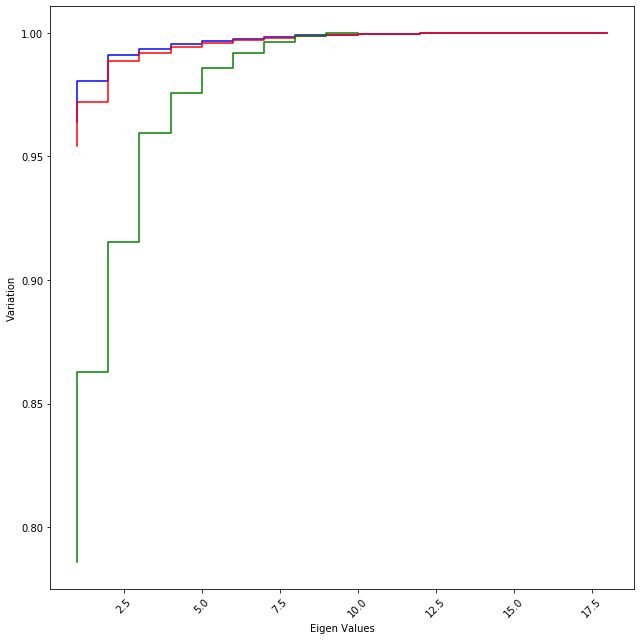

In [151]:
# Computing the cummulated sum of the all the variance ratios to understand the behaviour
fig = plt.figure()
plt.figure(figsize=(9, 9))

plt.subplot(111)
plt.step(list(range(1,19)),np.cumsum(pca_Zscore.explained_variance_ratio_),color = 'blue')
plt.step(list(range(1,19)),np.cumsum(pca_IQR.explained_variance_ratio_),color = 'red')
plt.step(list(range(1,11)),np.cumsum(pca_corr.explained_variance_ratio_),color = 'green')
plt.xticks(rotation=45)
plt.xlabel('Eigen Values')
plt.ylabel('Variation')

plt.tight_layout()


Observation:  Based on the above graph, PCA helps us to reduce the dimension from 18 to 10.  We can reuse the dataset that was created post removing the Highly correlated variables. 

## 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [196]:
# X and y Values and Data Split for Model Training
X_vehdf = vehdf.drop(['class'], axis=1) # Copy all except Target variable to X
y_vehdf = vehdf[['class']] # Copy the Target Variable to y
X_trainv, X_testv, y_trainv, y_testv =  train_test_split(X_vehdf,y_vehdf,test_size=0.30,random_state=15) # Split the data into Train and Test split


X_vehdf_corr = vehdf_corr.drop(['class'], axis=1) # Copy all except Target variable to X
y_vehdf_corr = vehdf_corr[['class']] # Copy the Target Variable to y
X_trainc, X_testc, y_trainc, y_testc =  train_test_split(X_vehdf_corr,y_vehdf_corr,test_size=0.30,random_state=15) # Split the data into Train and Test split

SVM_Dataset = [] # Capture Dataset
SVM_CValue = [] # Capture Labels
SVM_Kernel = [] # Capture Results
SVM_Results = []# Capture Precision Recall Score

print('Data split - Training set (raw):\n',y_trainv['class'].value_counts())
print('Data split - Test set (raw):\n',y_testv['class'].value_counts())

print('Data split - Training set (PCA):\n',y_trainc['class'].value_counts())
print('Data split - Test set (PCA):\n',y_testc['class'].value_counts())


Data split - Training set (raw):
 0    299
1    158
2    135
Name: class, dtype: int64
Data split - Test set (raw):
 0    130
2     64
1     60
Name: class, dtype: int64
Data split - Training set (PCA):
 0    299
1    158
2    135
Name: class, dtype: int64
Data split - Test set (PCA):
 0    130
2     64
1     60
Name: class, dtype: int64


In [197]:
C_Values = [0.01,0.05,0.1,1]
Krnl = ['linear','rbf']
for C in C_Values:
    for kernel in Krnl:
        svm = SVC(C=C,kernel=kernel,random_state=3)
        svm.fit(X_trainv, y_trainv)
        print('Support Vector Machines (SVM) Score for Training set =',svm.score(X_trainv, y_trainv))
        print('Support Vector Machines (SVM) Score for Test set =',svm.score(X_testv, y_testv))
        SVM_Dataset.append("Raw")
        SVM_CValue.append(C)
        SVM_Kernel.append(kernel)
        SVM_Results.append(svm.score(X_testv,y_testv))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Support Vector Machines (SVM) Score for Training set = 0.9712837837837838
Support Vector Machines (SVM) Score for Test set = 0.9409448818897638
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       130
           1       0.89      0.98      0.94        60
           2       0.95      0.92      0.94        64

    accuracy                           0.94       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.94      0.94      0.94       254

Support Vector Machines (SVM) Score for Training set = 0.5050675675675675
Support Vector Machines (SVM) Score for Test set = 0.5118110236220472
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       130
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        64

    accuracy                           0.51       254
   macro avg       0.17      0.33      0.23       254
weigh

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Support Vector Machines (SVM) Score for Training set = 0.5050675675675675
Support Vector Machines (SVM) Score for Test set = 0.5118110236220472
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       130
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        64

    accuracy                           0.51       254
   macro avg       0.17      0.33      0.23       254
weighted avg       0.26      0.51      0.35       254

Support Vector Machines (SVM) Score for Training set = 0.9780405405405406
Support Vector Machines (SVM) Score for Test set = 0.968503937007874
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       130
           1       0.95      0.98      0.97        60
           2       0.97      0.95      0.96        64

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weight

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Support Vector Machines (SVM) Score for Training set = 0.9831081081081081
Support Vector Machines (SVM) Score for Test set = 0.9566929133858267
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       130
           1       0.92      0.98      0.95        60
           2       0.95      0.94      0.94        64

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254

Support Vector Machines (SVM) Score for Training set = 1.0
Support Vector Machines (SVM) Score for Test set = 0.5118110236220472
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       130
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        64

    accuracy                           0.51       254
   macro avg       0.17      0.33      0.23       254
weighted avg       0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [198]:
C_Values = [0.01,0.05,0.1,1]
Krnl = ['linear','rbf']
for C in C_Values:
    for kernel in Krnl:
        svm = SVC(C=C,kernel=kernel,random_state=3)
        svm.fit(X_trainc, y_trainc)
        print('Support Vector Machines (SVM) Score for Training set =',svm.score(X_trainc, y_trainc))
        print('Support Vector Machines (SVM) Score for Test set =',svm.score(X_testc, y_testc))
        SVM_Dataset.append("PCA")
        SVM_CValue.append(C)
        SVM_Kernel.append(kernel)
        SVM_Results.append(svm.score(X_testc,y_testc))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Support Vector Machines (SVM) Score for Training set = 0.9375
Support Vector Machines (SVM) Score for Test set = 0.9133858267716536
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       130
           1       0.90      0.88      0.89        60
           2       0.87      0.94      0.90        64

    accuracy                           0.91       254
   macro avg       0.90      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254

Support Vector Machines (SVM) Score for Training set = 0.5050675675675675
Support Vector Machines (SVM) Score for Test set = 0.5118110236220472
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       130
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        64

    accuracy                           0.51       254
   macro avg       0.17      0.33      0.23       254
weighted avg     

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Support Vector Machines (SVM) Score for Training set = 1.0
Support Vector Machines (SVM) Score for Test set = 0.5196850393700787
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       130
           1       1.00      0.03      0.06        60
           2       0.00      0.00      0.00        64

    accuracy                           0.52       254
   macro avg       0.51      0.34      0.25       254
weighted avg       0.50      0.52      0.36       254



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [199]:
Raw_Dataset = pd.DataFrame(
    {'SVM Dataset': SVM_Dataset,
      'SVM CValue': SVM_CValue,
     'SVM Kernel': SVM_Kernel,
     'SVM Results':SVM_Results
    })
new_index = (Raw_Dataset['SVM Results'].sort_values(ascending=False)).index.values 
Raw_Dataset = Raw_Dataset.reindex(new_index)

Raw_Dataset

SVM Dataset  SVM CValue SVM Kernel  SVM Results
4          Raw        0.10     linear     0.968504
6          Raw        1.00     linear     0.956693
2          Raw        0.05     linear     0.952756
0          Raw        0.01     linear     0.940945
12         PCA        0.10     linear     0.921260
10         PCA        0.05     linear     0.921260
8          PCA        0.01     linear     0.913386
14         PCA        1.00     linear     0.909449
15         PCA        1.00        rbf     0.519685
13         PCA        0.10        rbf     0.511811
11         PCA        0.05        rbf     0.511811
9          PCA        0.01        rbf     0.511811
7          Raw        1.00        rbf     0.511811
5          Raw        0.10        rbf     0.511811
3          Raw        0.05        rbf     0.511811
1          Raw        0.01        rbf     0.511811

Observation:  The above table shows that the optimal C is 0.10 for train_test split of 70/30.  This stays for both Raw data and the scaled data.  Also Linear Kernel needs to be used.

In [202]:
svm = SVC(C=0.10,kernel= 'linear',random_state=3)
svm.fit(X_trainv, y_trainv)
y_predictS1 = svm.predict(X_testv)
print('Support Vector Machines (SVM) Score for Training set =',svm.score(X_trainv, y_trainv))
print('Support Vector Machines (SVM) Score for Test set =',svm.score(X_testv, y_testv))
print(metrics.classification_report(y_testv, y_predictS1))

svm = SVC(C=0.10,kernel='linear',random_state=3)
svm.fit(X_trainc, y_trainc)
y_predictS2 = svm.predict(X_testc)
print('Support Vector Machines (SVM) Score for Training set =',svm.score(X_trainc, y_trainc))
print('Support Vector Machines (SVM) Score for Test set =',svm.score(X_testc, y_testc))
print(metrics.classification_report(y_testc, y_predictS2))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machines (SVM) Score for Training set = 0.9780405405405406
Support Vector Machines (SVM) Score for Test set = 0.968503937007874
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       130
           1       0.95      0.98      0.97        60
           2       0.97      0.95      0.96        64

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254

Support Vector Machines (SVM) Score for Training set = 0.956081081081081
Support Vector Machines (SVM) Score for Test set = 0.9212598425196851
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       130
           1       0.89      0.92      0.90        60
           2       0.91      0.94      0.92        64

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.92       254
weighte

In [203]:
y_Compare = y_testc.copy()
y_Compare['Raw']=y_predictS1
y_Compare['PCA']=y_predictS2

y_Compare.apply(pd.value_counts)

class  Raw  PCA
0    130  129  126
2     64   63   66
1     60   62   62

### Conclusion
Further to applying the Support Vector Machine Algority with various C values on the Initial and Dimension-reduced Dataset it was identified that C=0.10 is the optimal value for a train and test split of 70 and 30.  The accuracy is around 97% for the initial dataset and 92% for the PCA treated dataset.  For this current problem statement Raw data seems to have a better accuracy, however we identified Missing Values, Outliers and Multicollinearty issues.  We treated the data to find out that with a reduced number of variables we still have a similar result.